
# Boop boop

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

import importlib

import utils
import models

In [2]:
train_articles = utils.load_articles('wikitext-103-raw/wiki.train.raw')
valid_articles = utils.load_articles('wikitext-103-raw/wiki.valid.raw')
test_articles = utils.load_articles('wikitext-103-raw/wiki.test.raw')

In [103]:
importlib.reload(utils)
# char_encoding = utils.get_encoding(train_articles + valid_articles + test_articles)
char_encoding = utils.get_encoding(valid_articles)
char2int, int2char, int2hot, str2hot, hot2int, hot2str = char_encoding

In [68]:
hot2str(str2hot("This is a string with words"))

'This is a string with words'

In [104]:
importlib.reload(models)

rnn_net_25 = models.RNNModule(len(char2int), 25)
rnn_net_50 = models.RNNModule(len(char2int), 50)
rnn_net_100 = models.RNNModule(len(char2int), 100)

lstm_net_25 = models.LSTMModule(len(char2int), 25)
lstm_net_50 = models.LSTMModule(len(char2int), 50)
lstm_net_100 = models.LSTMModule(len(char2int), 100)

In [116]:
from collections import Counter
Counter("".join(valid_articles))

Counter({' ': 214791,
         '\n': 3714,
         '=': 2876,
         'H': 1757,
         'o': 60524,
         'm': 19340,
         'a': 71422,
         'r': 55077,
         'u': 22010,
         's': 51059,
         'g': 16820,
         ',': 10331,
         'k': 5540,
         'n': 62586,
         'w': 13553,
         't': 73176,
         'h': 39711,
         'e': 102047,
         'E': 974,
         'p': 15134,
         'l': 33458,
         'b': 10697,
         'c': 25239,
         'i': 60717,
         'f': 17835,
         'd': 33422,
         'A': 3861,
         'O': 905,
         'M': 2882,
         'S': 4003,
         'B': 2544,
         '.': 8842,
         'I': 2041,
         'y': 12650,
         '6': 982,
         '0': 3474,
         '(': 1127,
         '2': 2518,
         '4': 1010,
         ')': 1125,
         '1': 3867,
         '3': 1143,
         '"': 2507,
         'v': 8322,
         'D': 1488,
         '5': 1242,
         '–': 355,
         '8': 1296,
         '9': 2267,

In [106]:
#train rnn_net_25
losses_rnn_25 = models.train(rnn_net_25, valid_articles, char_encoding)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


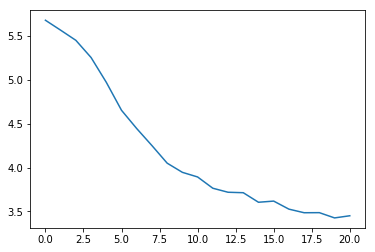

In [107]:
plt.plot(losses_rnn_25)
plt.show()

In [108]:
hot2str(list(models.predict(rnn_net_25, char_encoding, "Very cool")))

'方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方方'

In [78]:
#train rnn_net_50
losses_rnn_50 = models.train(rnn_net_50, train_articles, char_encoding)

Interrupted training at article 9: 9.5s getting tensors......rs...


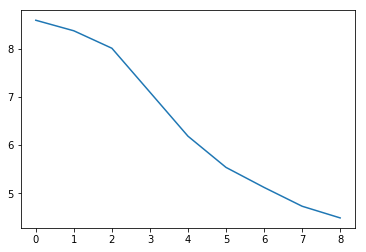

In [79]:
plt.plot(losses_rnn_50)
plt.show()

In [91]:
hot2str(list(models.predict(rnn_net_50, char_encoding, "Wow")))

'濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞濞'

In [85]:
#train rnn_net_100
losses_rnn_100 = models.train(rnn_net_100, train_articles, char_encoding)

Interrupted training at article 10: 24.62s calculating loss.....


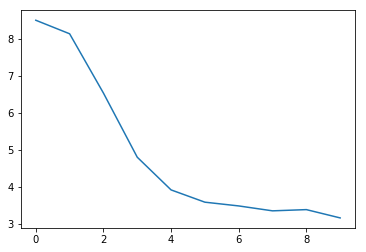

In [86]:
plt.plot(losses_rnn_100)
plt.show()

In [92]:
hot2str(list(models.predict(rnn_net_100, char_encoding, "This totally works")))

'磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲磲'

In [93]:
#train lstm_net_25
losses_lstm_25 = models.train(lstm_net_25, train_articles, char_encoding)

Interrupted training at article 10.............ward pass........


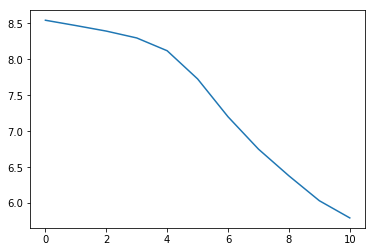

In [94]:
plt.plot(losses_lstm_25)
plt.show()

In [95]:
hot2str(list(models.predict(lstm_net_25, char_encoding, "This totally works")))

'@ddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd'

In [ ]:
#train lstm_net_50
losses_lstm_50 = models.train(lstm_net_50, train_articles, char_encoding)

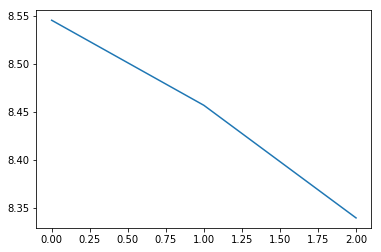

In [106]:
plt.plot(losses_lstm_50)
plt.show()

In [9]:
#train lstm_net_100
losses_lstm_100 = models.train(lstm_net_100, train_articles, char_encoding)

In [ ]:
plt.plot(losses_lstm_100)
plt.show()